#### Procesamiento Digital de Señales

# Trabajo Práctico 4
#### Ramiro Castagnola

***
## Filtrado


<div class="alert alert-block alert-info">
<b>1)</b> Para el siguiente filtro digital se pide:

</div>

 $$ y(k) = \frac{1}{N} \sum_{i=0}^{N-1} x(k-i)  $$
 
 Para N = [3; 5]

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./Cap2.jpg" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante la simulación computacional


In [1]:
## Inicialización del Notebook del TP4

import numpy as np
from pandas import DataFrame
from IPython.display import HTML
from scipy import signal as sig
import warnings
warnings.filterwarnings('ignore')

# Insertar aquí el código para inicializar tu notebook
########################################################

import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
#mpl.rcParams['figure.figsize'] = (10,10)

import matplotlib.pyplot as plt

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
#fig_sz_x = 14
#fig_sz_y = 13
#fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
#fig_font_size = 16

#plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)


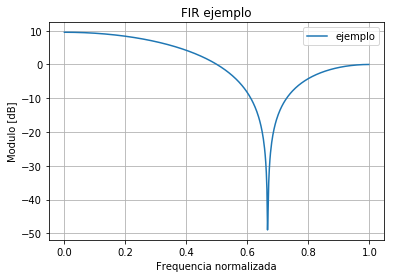

In [2]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

ww, hh = sig.freqz(np.array([1, 1, 1]), 1)
ww = ww / np.pi

plt.figure(1)

plt.plot(ww, 20 * np.log10(abs(hh)), label='ejemplo')

plt.title('FIR ejemplo')
plt.xlabel('Frequencia normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both', axis='both')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.show()


<div class="alert alert-block alert-info">
<b>2)</b> Para el siguiente filtro digital se pide:

</div>


$$ h(k) = (-1, 1) $$
 


   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./escriba_aqui.png" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


In [3]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


<div class="alert alert-block alert-info">
<b>3)</b> Para el siguiente filtro digital se pide:

</div>


<img src="./comb.png" align="center" width="30%" /> 


Para $N= (2; 4)$ y $b = -1$

   a) El diagrama de polos y ceros y su respuesta de módulo y fase



<img src="./Cap1.jpg" align="center" width="50%" /> 


   b) Corrobore su respuesta mediante simulación computacional


In [4]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################



<div class="alert alert-block alert-info">
<b>4)</b> En el archivo <i>ECG_TP4.mat</i> encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Diseñe y aplique los filtros digitales necesarios para mitigar las siguientes fuentes de contaminación:
</div>

 - Ruido causado por el movimiento de los electrodos (Alta frecuencia)
 - Ruido muscular (Alta frecuencia)
 - Movimiento de la línea de base del ECG, inducido en parte por la respiración (Baja frecuencia)
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Los latidos presentes en el registro de ECG, alineados y clasificados (de origen normal y ventricular) poseen las siguientes características temporales y frecuenciales:
</div>


<img src="./latidos_tiempo.png" align="center" width="80%" /> 

<img src="./latido_promedio.png" align="center" width="80%" /> 

<img src="./latidos_espectro.png" align="center" width="80%" /> 


### Archivo *ECG_TP4.mat*
(variables)
 - **ecg_lead**: Registro de ECG muestreado a $fs=1$ KHz durante una prueba de esfuerzo
 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 - **qrs_detections**: vector con las localizaciones (en # de muestras) donde ocurren los latidos
 
a) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a *suavidad* de los trazos y nivel isoeléctrico nulo.
 

In [5]:
# Defina la plantilla del filtro

fs0 = '1Hz' # fin de la banda de detenida 0
fc0 = '2Hz' # comienzo de la banda de paso
fc1 = '40Hz' # fin de la banda de paso
fs1 = '45Hz' # comienzo de la banda de detenida 1


b) ¿Cómo obtuvo dichos valores? 
 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Descartando los movimientos de linea de base que se encuentran por debajo de 1Hz, y teniendo en cuenta que las señales poseen información util en frecuencia relativamente bajas, hasta los 40HZ.
La segunda banda de detención se la situa antes de los 50HZ para no captar ruido de red.
</div>

c) Diseñe **al menos** dos filtros FIR y dos IIR para su comparación. Verifique que la respuesta en frecuencia responda a la plantilla de diseño
  

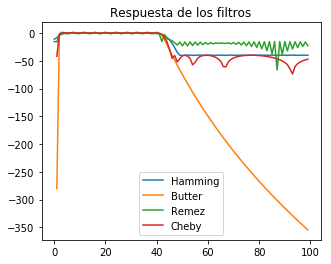

In [6]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import warnings
warnings.filterwarnings('ignore')
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

def vertical_flaten(a):
    
    return a.reshape(a.shape[0],1)

mpl.rcParams['figure.figsize'] = (5,4)

sio.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('ECG_TP4.mat')

señal = mat_struct['ecg_lead']
señal = señal.flatten(1)
N = len(señal)

fs = 1000 # Hz
nyq_frec = fs / 2

######################################################################
ripple = 0.5 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 2.0 #Hz
wp2 = 40.0 #Hz
ws2 = 45.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

#######################################################################
cant_coef = 501

FiltroWin = sig.firwin2(cant_coef, frecs, gains , window='hamming' )

_, spWin = sig.freqz(FiltroWin)

señalWin = sig.filtfilt(FiltroWin,1, señal)
#######################################################################
FiltroRemez = sig.remez(501, [0, 0.001, 0.002, 0.04, 0.045,0.5], [0, 1, 0])

_, spRemez = sig.freqz(FiltroRemez)

señalRemez = sig.filtfilt(FiltroRemez,1, señal)

########################################################################
FiltroButter = sig.iirdesign(wp=np.array([wp1, wp2]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.5, gstop=40., analog=False, ftype='butter', output='sos')

_, spButter = sig.sosfreqz(FiltroButter)

señalButter = sig.sosfiltfilt(FiltroButter, señal)

###########################################################################
FiltroCheby = sig.iirdesign(wp=np.array([wp1, wp2]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.5, gstop=40., analog=False, ftype='cheby2', output='sos')

_, spCheby = sig.sosfreqz(FiltroCheby)

señalCheby = sig.sosfiltfilt(FiltroCheby, señal)

########################################################################

plt.figure(1)
plt.title('Respuesta de los filtros')
plt.plot(20 * np.log10(abs(spWin[0:100])),label='Hamming')
plt.plot(20 * np.log10(abs(spButter[0:100])),label='Butter')
plt.plot(20 * np.log10(abs(spRemez[0:100])),label='Remez')
plt.plot(20 * np.log10(abs(spCheby[0:100])),label='Cheby')

axes_hdl = plt.gca()
axes_hdl.legend()



d) Evalúe el rendimiento de los filtros que haya diseñado: 

 1. Verifique que filtra las señales interferentes
 2. Verifique que es inocuo en las zonas donde no hay interferentes



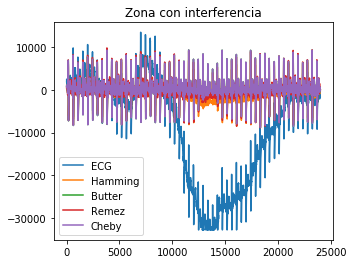

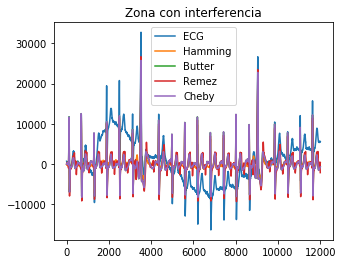

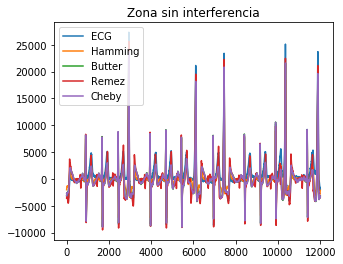

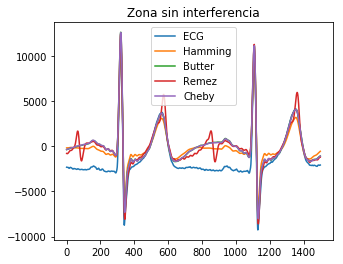

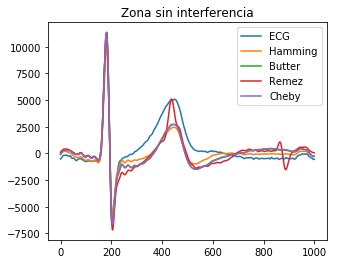

In [7]:
# Acá podés generar los gráficos pedidos #
##########################################
LimitInfA = int(12*60*fs)
LimitSupA = int(12.4*60*fs)

LimitInfB = int(15*60*fs)
LimitSupB = int(15.2*60*fs)

LimitInfC = int(5*60*fs)
LimitSupC = int(5.2*60*fs)

LimitInfD = int(4000)
LimitSupD = int(5500)

LimitInfE = int(10000)
LimitSupE = int(11000)

plt.figure(2)
plt.title('Zona con interferencia')
plt.plot(señal[LimitInfA:LimitSupA],label='ECG')
plt.plot(señalWin[LimitInfA:LimitSupA],label='Hamming')
plt.plot(señalButter[LimitInfA:LimitSupA],label='Butter')
plt.plot(señalRemez[LimitInfA:LimitSupA],label='Remez')
plt.plot(señalCheby[LimitInfA:LimitSupA],label='Cheby')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(3)
plt.title('Zona con interferencia')
plt.plot(señal[LimitInfB:LimitSupB],label='ECG')
plt.plot(señalWin[LimitInfB:LimitSupB],label='Hamming')
plt.plot(señalButter[LimitInfB:LimitSupB],label='Butter')
plt.plot(señalRemez[LimitInfB:LimitSupB],label='Remez')
plt.plot(señalCheby[LimitInfB:LimitSupB],label='Cheby')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(4)
plt.title('Zona sin interferencia')
plt.plot(señal[LimitInfC:LimitSupC],label='ECG')
plt.plot(señalWin[LimitInfC:LimitSupC],label='Hamming')
plt.plot(señalButter[LimitInfC:LimitSupC],label='Butter')
plt.plot(señalRemez[LimitInfC:LimitSupC],label='Remez')
plt.plot(señalCheby[LimitInfC:LimitSupC],label='Cheby')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(5)
plt.title('Zona sin interferencia')
plt.plot(señal[LimitInfD:LimitSupD],label='ECG')
plt.plot(señalWin[LimitInfD:LimitSupD],label='Hamming')
plt.plot(señalButter[LimitInfD:LimitSupD],label='Butter')
plt.plot(señalRemez[LimitInfD:LimitSupD],label='Remez')
plt.plot(señalCheby[LimitInfD:LimitSupD],label='Cheby')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(6)
plt.title('Zona sin interferencia')
plt.plot(señal[LimitInfE:LimitSupE],label='ECG')
plt.plot(señalWin[LimitInfE:LimitSupE],label='Hamming')
plt.plot(señalButter[LimitInfE:LimitSupE],label='Butter')
plt.plot(señalRemez[LimitInfE:LimitSupE],label='Remez')
plt.plot(señalCheby[LimitInfE:LimitSupE],label='Cheby')

axes_hdl = plt.gca()
axes_hdl.legend()


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se comprueba el correcto funcionamiento de los filtros para los casos en los que se produce una fuerte interferencia relacionada con la linea de base, mientras que los casos sin interferencia no se observa una gran precisión pero logra seguir el patron de la señal correctamente.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> Utilice las siguientes metodologías <b>no lineales</b> de estimación-substracción para la remoción de la interferencia de línea de base, y compare con las técnicas lineales del punto anterior en las mismas regiones. Luego discuta las ventajas y desventajas de cada técnica.
</div>

a) Estimación del movimiento de línea de base a partir del filtrado de mediana. A partir de la siguiente estimación del movimiento de línea de base 

$$ \hat{b} = \mathop{med}_{600} \{ \mathop{med}_{200} \{s\} \} $$

Donde $s$ representa la señal de ECG a partir de la que estimamos el movimiento de la línea de base $ \hat{b}$. El operador $\mathop{med}_{200}$ calcula muestra a muestra la mediana en los 200 ms previos a la muestra actual. Luego dicha estimación la substraemos para estimar la actividad eléctrica cardíaca $\hat{x}$

$$ \hat{x} = s - \hat{b} $$


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la implementación del <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html#median-filter">filtro de mediana provista en <b>scipy.signal</b></a>
</div>

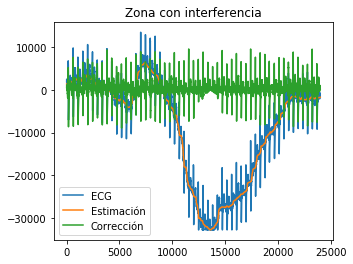

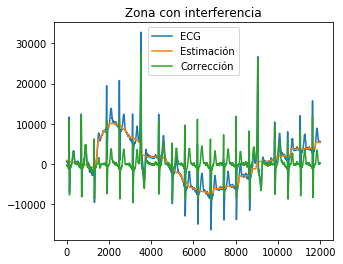

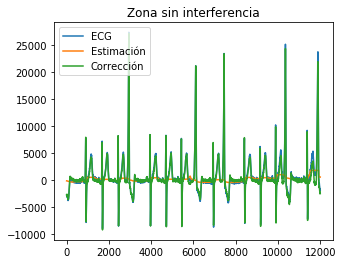

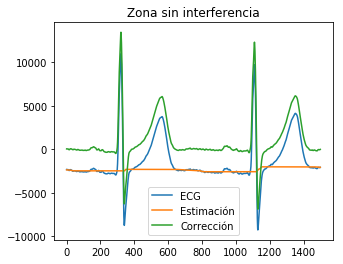

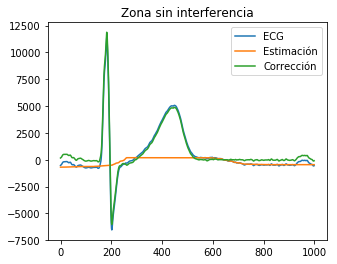

In [8]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

Ventana1 = sig.medfilt(señal, 201)

Ventana2 = sig.medfilt(Ventana1, 601)

X = señal - Ventana2

plt.figure(1)
plt.title('Zona con interferencia')
plt.plot(señal[LimitInfA:LimitSupA],label='ECG')
plt.plot(Ventana2[LimitInfA:LimitSupA],label='Estimación')
plt.plot(X[LimitInfA:LimitSupA],label='Corrección')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(2)
plt.title('Zona con interferencia')
plt.plot(señal[LimitInfB:LimitSupB],label='ECG')
plt.plot(Ventana2[LimitInfB:LimitSupB],label='Estimación')
plt.plot(X[LimitInfB:LimitSupB],label='Corrección')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(3)
plt.title('Zona sin interferencia')
plt.plot(señal[LimitInfC:LimitSupC],label='ECG')
plt.plot(Ventana2[LimitInfC:LimitSupC],label='Estimación')
plt.plot(X[LimitInfC:LimitSupC],label='Corrección')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(4)
plt.title('Zona sin interferencia')
plt.plot(señal[LimitInfD:LimitSupD],label='ECG')
plt.plot(Ventana2[LimitInfD:LimitSupD],label='Estimación')
plt.plot(X[LimitInfD:LimitSupD],label='Corrección')

axes_hdl = plt.gca()
axes_hdl.legend()

plt.figure(5)
plt.title('Zona sin interferencia')
plt.plot(señal[LimitInfE:LimitSupE],label='ECG')
plt.plot(Ventana2[LimitInfE:LimitSupE],label='Estimación')
plt.plot(X[LimitInfE:LimitSupE],label='Corrección')

axes_hdl = plt.gca()
axes_hdl.legend()




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para este metodo, se cuenta como principal ventaja la gran precisión que tiene a costa de un gran tiempo de procesamiento.
</div>

b) Estimación del movimiento de línea de base a partir de los segmentos isoeléctricos de cada latido. A partir de las detecciones provistas, puede estimar aproximadamente el nivel isoeléctrico, es decir el momento donde la actividad eléctrica cardíaca es **nula**. El intervalo entre la onda P y Q, es un buen momento para estimar las características de las señales interferentes que originan el movimiento de la línea de base.

<img src="./pq.png" align="center" width="80%" /> 

Para la localización del segmento PQ puede valerse de la localización de cada latido (líneas rojas verticales) y a partir de la misma, anticipar un tiempo adecuado de manera tal de no incluir la onda P ni Q. Puede ayudarse con el latido promedio de un latido normal para establecer dicho intervalo.

Recuerde que la señal de línea de base debe estar muestreada a la misma frecuencia que el ECG, por lo que debería remuestrear dicha señal (puede usar la función de interpolación spline para ello).

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar la función de interpolación <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html">spline <b>scipy.interpolate.CubicSpline</b></a>
</div>

In [9]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################




<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>6)</b> Para la señal de ECG provista junto con este documento, aplique el concepto de <b>filtro adaptado</b> y otras técnicas de filtrado digital para diseñar un detector de latidos. Los patrones provistos son:

</div>


 - **qrs_pattern1**: Complejo de ondas QRS normal
 - **heartbeat_pattern1**: Latido normal
 - **heartbeat_pattern2**: Latido de origen ventricular
 

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Revise el concepto de filtro adaptado en <a href="http://en.wikipedia.org/wiki/Matched_filter">Wikipedia</a>, o la bibliografía de la materia (Porat 14.4.9).
</div>

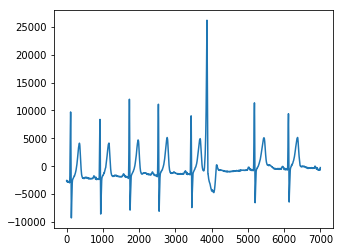

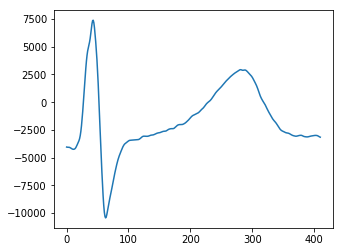

In [10]:
import scipy.io as sio

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])
N = len(ecg_one_lead)

hb_1 = vertical_flaten(mat_struct['heartbeat_pattern1'])

plt.figure(1)
plt.plot(ecg_one_lead[5000:12000])

plt.figure(2)
plt.plot(hb_1)



a) Explique conceptualmente cómo podría realizar un detector de latidos con la señal resultante del filtro adaptado. Discuta la utilidad y limitaciones de este método. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

   
   b) Realice la detección de los latidos, comparando las detecciones obtenidas con las que se incluyen en la variable **qrs_detections**. Proponga alguna métrica para cuantificar las diferencias.


In [11]:

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

